# Curve Fitting

$Y = f(X, \beta)$

where $f(\cdot)$ is some regression function, $X$ are our independent variables, $Y$ are our dependent variables, and $\beta$ is an unknown parameter.

If we want to find a line of best fit for points $(x_i, y_i)$, we let $f(x) = Ax + B$, where $A$ and $B$ are constants.  We then have $Y = f(X, \beta) = AX + B$.

The approximation error at each point, the difference between our model's prediction and the true value at that point, can be found as $E_k = g\bigg(f(x_k) - y_k\bigg)$. 

Common error functions include:

1) $E_\infty (f) = \max_{1 <k < n} |f(x_k) - y_k)|$ 

2) $E_1(f) = \frac{1}{n} \sum_{k=1}^n |f(x_k) - y_k|$

3) $E_2 = \bigg( \frac{1}{n} \sum_{k=1}^n |f(x_k) - y_k|^2 \bigg)^{1/2} $

# Best Linear Fit

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

Text(0.5, 1.0, 'Data For Linear Fit')

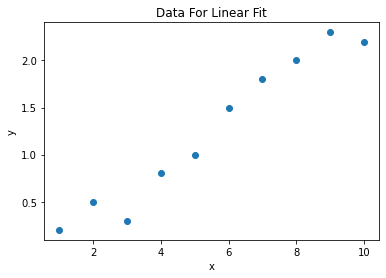

In [2]:
# Generate Data
x = np.arange(1,11)
y = np.array([0.2, 0.5, 0.3, 0.8, 1.0, 1.5, 1.8, 2.0, 2.3, 2.2])


plt.figure()
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data For Linear Fit')


Let's try to find the line of best fit by minimizing the $E_2$ error. 

$E_2 = \bigg(\frac{1}{n} \sum_{k=1}^n |f(x_k) - y_k|^2\bigg)^{1/2}$

$\min_{\beta = [A,B]} E_2 = \min_{[A,B]} \bigg( \frac{1}{n} \sum_{k=1}^n |Ax_k + B - y_k|^2 \bigg)^{1/2} = \min_{[A,B]} \sum_{k=1}^n |Ax_k + B - y_k|^2 $

How do we find the minimum?

We differentiate! We require $\frac{\partial E_2}{\partial A} = 0$ and $\frac{\partial E_2}{\partial B} = 0$

$\frac{\partial E_2}{\partial A} = \sum_{k=1}^n 2(Ax_k + B -y_k) x_k = 0$

$\frac{\partial E_2}{\partial B} = \sum_{k=1}^n 2(Ax_k + B -y_k) = 0$

We can rearrange these equations as:

$\sum_{k=1}^n (Ax_k^2 + Bx_k -y_kx_k) = 0 \implies \sum_{k=1}^n (Ax_k^2 + Bx_k) = \sum_{k=1}^n y_k x_k$

$\sum_{k=1}^n (Ax_k + B -y_k) = 0 \implies \sum_{k=1}^n (Ax_k + B) = \sum_{k=1}^n y_k $

We can write this system as a matrix equation as follows,

$\begin{bmatrix}\sum_{k=1}^n x_k^2 & \sum_{k=1}^n x_k \\ \sum_{k=1}^n x_k & n \end{bmatrix} \begin{bmatrix} A \\ B \end{bmatrix} = \begin{bmatrix} \sum_{k=1}^n y_k x_k \\ \sum_{k=1}^n y_k \end{bmatrix}$

We can solve a matrix equation $M\beta = c$ by using np.linalg.solve

Text(0.5, 1.0, 'Data For Linear Fit')

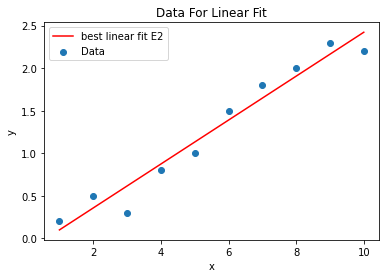

In [3]:
def lineOfBestFit(params, x):
    f = lambda xk: params[0]*xk + params[1]
    
    return f(x)

def minE2(x, y):
    '''
    inputs
    -------
    x: vec, independent variable
    y: vec, dependent variable
    
    outputs
    -------
    ypred: vec, predicted best linear fit using E2
    
    '''
    #Set up the matrix equation
    M = np.array([[np.sum(x**2),np.sum(x)], [np.sum(x), 10]])
    c = np.array([np.sum(y*x), np.sum(y)])

    #Solve for beta = [A,B]
    beta = np.linalg.solve(M, c)

    #Create line of best fit
    #f = lambda xk : beta[0]*xk + beta[1]

    ypred = lineOfBestFit(beta, x)
    
    return ypred


ypred = minE2(x, y)

plt.figure()
plt.scatter(x,y, label = 'Data')
plt.plot(x,ypred, c = 'r', label = 'best linear fit E2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Data For Linear Fit')




Optimization terminated successfully.
         Current function value: 0.128573
         Iterations: 63
         Function evaluations: 121
Optimization terminated successfully.
         Current function value: 0.230006
         Iterations: 61
         Function evaluations: 115


Text(0.5, 1.0, 'Data For Linear Fit')

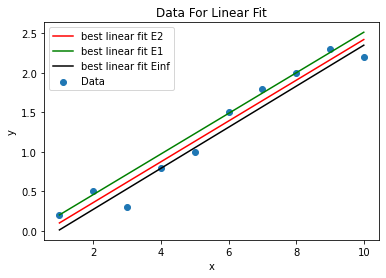

In [4]:
def E1(beta):
    return 1/len(x) * np.sum(np.abs(beta[0]*x + beta[1] - y))

def Einf(beta):
    return np.max(np.abs(beta[0]*x + beta[1] - y))

betaoptE1 = scipy.optimize.fmin(func=E1, x0=[-1.2,1])
betaoptEinf = scipy.optimize.fmin(func=Einf, x0=[-1.2,1])

ypred2 = lineOfBestFit(betaoptE1, x)
ypred3 = lineOfBestFit(betaoptEinf, x)
    
plt.figure()
plt.scatter(x,y, label = 'Data')
plt.plot(x,ypred, c = 'r', label = 'best linear fit E2')
plt.plot(x,ypred2, c = 'g', label = 'best linear fit E1')
plt.plot(x,ypred3, c = 'k', label = 'best linear fit Einf')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Data For Linear Fit')




# Linear fit for data with outliers

Text(0.5, 1.0, 'Data For Linear Fit')

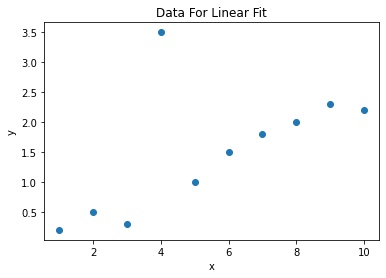

In [5]:
y_out = np.array([0.2, 0.5, 0.3, 3.5, 1.0, 1.5, 1.8, 2.0, 2.3, 2.2])


plt.figure()
plt.scatter(x,y_out)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data For Linear Fit')


Optimization terminated successfully.
         Current function value: 0.364002
         Iterations: 68
         Function evaluations: 130
Optimization terminated successfully.
         Current function value: 1.464300
         Iterations: 70
         Function evaluations: 132


Text(0.5, 1.0, 'Data For Linear Fit')

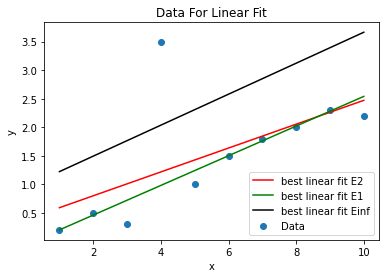

In [6]:
ypred = minE2(x, y_out)

def E1(beta):
    return 1/len(x) * np.sum(np.abs(beta[0]*x + beta[1] - y_out))

def Einf(beta):
    return np.max(np.abs(beta[0]*x + beta[1] - y_out))

betaoptE1 = scipy.optimize.fmin(func=E1, x0=[-1.2,1])
betaoptEinf = scipy.optimize.fmin(func=Einf, x0=[-1.2,1])

ypred2 = lineOfBestFit(betaoptE1, x)
ypred3 = lineOfBestFit(betaoptEinf, x)
    
plt.figure()
plt.scatter(x,y_out, label = 'Data')
plt.plot(x,ypred, c = 'r', label = 'best linear fit E2')
plt.plot(x,ypred2, c = 'g', label = 'best linear fit E1')
plt.plot(x,ypred3, c = 'k', label = 'best linear fit Einf')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Data For Linear Fit')




Recall:

1) $E_\infty (f) = \max_{1 <k < n} |Ax_k + B - y_k|$ 

2) $E_1(f) = \frac{1}{n} \sum_{k=1}^n |Ax_k + B - y_k|$

3) $E_2 = \bigg( \frac{1}{n} \sum_{k=1}^n |Ax_k + B - y_k|^2 \bigg)^{1/2} $

# Over-determined systems

More constraints than unknowns so that in general, $Ax = b$ has no solution.  This means that we want to find $\arg \min_x ||Ax- b||_2$.  We may also want to invoke some constraint on our solution $x$. 

$\arg \min_x ||Ax- b||_2 + \lambda_1 ||x||_1 + \lambda_2 ||x||_2$

where $\lambda_1, \lambda_2$ are parameters that control the penalization of the l1 and l2 norms, respectively


To recap, 

$||x||_1 = \sum_{k=1}^n |x_k|$

$||x||_2 = \sqrt{\sum_{k=1}^n |x_k|^2}$

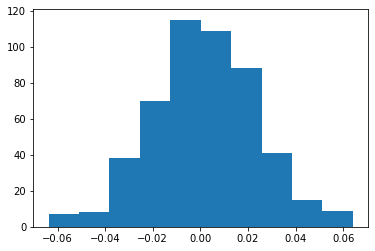

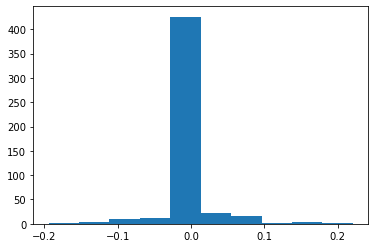

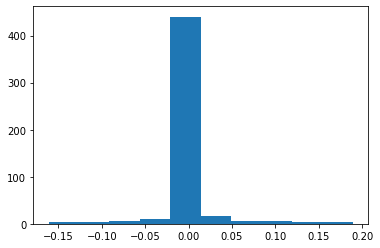

In [7]:
import cvxpy as cp

n = 500
m = 100

A = np.random.rand(m,n)
b = np.random.rand(m)

lam = [0, 0.1, 0.5]

for i in range(len(lam)):
    # Construct the problem.
    x = cp.Variable(n)
    objective = cp.Minimize(cp.norm(A@x - b,2)**2 + lam[i]* cp.norm(x,1))
    prob = cp.Problem(objective)

    # The optimal objective value is returned by `prob.solve()`.
    result = prob.solve()
    # The optimal value for x is stored in `x.value`.

    plt.figure()
    plt.hist(x.value)


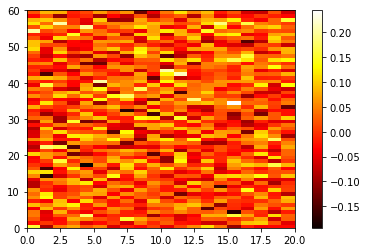

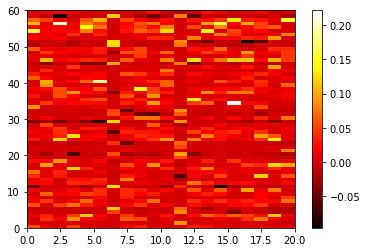

In [8]:
n = 300
m = 60
p=20

A = np.random.rand(n,m)
b = np.random.rand(n,p)

lam = [0, 0.1]

for i in range(len(lam)):
    # Construct the problem.
    x = cp.Variable((m,p))
    objective = cp.Minimize(cp.norm(A@x - b,2)**2 + lam[i]* cp.norm(x,1))
    prob = cp.Problem(objective)

    # The optimal objective value is returned by `prob.solve()`.
    result = prob.solve()
    # The optimal value for x is stored in `x.value`.
        
    plt.figure()
    plt.pcolor(x.value, cmap = 'hot')
    plt.colorbar()



# Under-determined Systems

There are an infinite number of possible solutions to $Ax = b$.  Therefore, we need additional constraints to generate a unique solution.

$\min_x ||x||_p$ subject to $Ax = b$

Text(0.5, 1.0, 'Histogram of solution vals (l2 norm)')

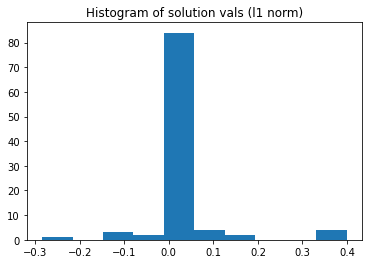

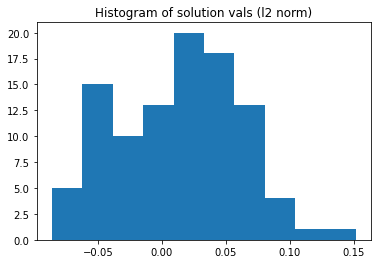

In [15]:
n = 20
m = 100

A = np.random.rand(n,m)
b = np.random.rand(n)

##One Norm ##

# Construct the problem.
x = cp.Variable(m)
objective = cp.Minimize(cp.norm(x,1))
constraints = [A@x == b]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
# The optimal value for x is stored in `x.value`.

plt.figure()
plt.hist(x.value)
plt.title('Histogram of solution vals (l1 norm)')

##Two Norm##

# Construct the problem.
x = cp.Variable(m)
objective = cp.Minimize(cp.norm(x,2))
constraints = [A@x == b]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
# The optimal value for x is stored in `x.value`.


plt.figure()
plt.hist(x.value)
plt.title('Histogram of solution vals (l2 norm)')





# The problem we're concerned with minimizing

$\arg \min_x ||Ax - b||_2 + \lambda_1 ||x||_1 + \lambda_2 ||x||_2$

We can use a few built-in methods to solve the above problem:

1) np.linalg.pinv(A, b) solves the above when $\lambda_1 = \lambda_2 = 0$

2) sklearn.linear_model.Lasso solves the above when $\lambda_1 >0, \lambda_2 = 0$

3) sklearn.linear_model.Ridge solves the above when $\lambda_1 = 0, \lambda_2 >0$

4) sklearn.linear_model.ElasticNet solves the above when $\lambda_1>0, \lambda_2 >0$

Where to get MNIST data:

https://pypi.org/project/python-mnist/

In [18]:
daf


NameError: name 'daf' is not defined